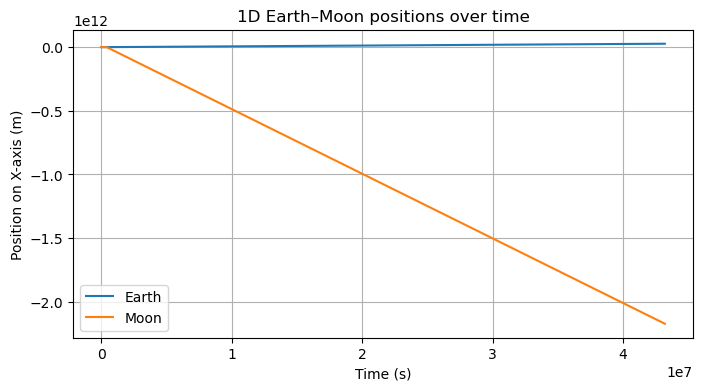

In [ ]:
import math
import matplotlib.pyplot as plt

# Debug
debug = False

# Constantes
G = 6.67430e-11
M_TERRE = 5.97219e24
M_LUNE = 7.3477e22

# Positions et vitesses initiales (1D)
x_terre = 0.0
x_lune = 3.844e8
v_terre = 0.0
v_lune = 0.0

# Paramètres temporels
t = 0.0
dt = 600.0        # 60 s
T_MAX = 24 * 3600  *500 # ex. 500 jour de simulation

# Pour le graphe
times = []
positions_terre = []
positions_lune = []

while t <= T_MAX:
    # Sauvegarde des valeurs actuelles
    times.append(t)
    positions_terre.append(x_terre)
    positions_lune.append(x_lune)

    # 1) Calcul de la distance
    dx = x_lune - x_terre
    r = abs(dx)

    # 2) Force gravitationnelle F = G*M1*M2 / r^2
    if r == 0:
        F = 0
    else:
        F = G * M_TERRE * M_LUNE / (r*r)

    # 3) Gérer le sens de la force en 1D
    #    si x_lune > x_terre, la force sur la Lune est dirigée vers la Terre
    if dx > 0:
        force_lune = -F   # vers la gauche
    else:
        force_lune = F    # vers la droite

    force_terre = -force_lune

    # 4) Accélérations
    a_lune = force_lune / M_LUNE
    a_terre = force_terre / M_TERRE

    # 5) Mise à jour vitesses (Euler)
    v_lune += a_lune * dt
    v_terre += a_terre * dt

    # 6) Mise à jour positions (Euler)
    x_lune += -v_lune * dt
    x_terre += -v_terre * dt

    # 7) Affichage (optionnel)
    if debug: print(f"t={t:.0f}s,  distance r={r:.8e}m,  v_lune={v_lune:.3e}m/s,  x_lune={x_lune:.3e}m")

    # 8) Avancement du temps
    t += dt

# === Graphique ===

plt.figure(figsize=(8, 4))
plt.plot(times, positions_terre, label="Earth")
plt.plot(times, positions_lune, label="Moon")
plt.title("1D Earth–Moon positions over time")
plt.xlabel("Time (s)")
plt.ylabel("Position on X-axis (m)")
plt.legend()
plt.grid(True)
plt.show()
